<a href="https://colab.research.google.com/github/Sahir109/defect-detection-using-cnn/blob/master/Tilda_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zeeshanyaqoob","key":"6b6b74176185263c90327bef28b04f16"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                        title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                 47KB  2023-08-26 11:04:57           6826        221  1.0              
nelgiriyewithana/global-youtube-statistics-2023            Global YouTube Statistics 2023                   60KB  2023-07-28 15:36:38          17155        559  1.0              
devanshinigam/popular-movies-top-250-movies-imdb           Popular Movies (Top 250 movies IMDb)              9KB  2023-09-08 11:06:29            623         25  1.0              
joebeachcapital/students-performance                       Students Performance                          

In [7]:
! kaggle datasets download -d angelolmg/tilda-400-64x64-patches

 98% 140M/142M [00:07<00:00, 23.4MB/s]
100% 142M/142M [00:07<00:00, 21.1MB/s]


In [8]:
! unzip tilda-400-64x64-patches.zip

Streaming output truncated to the last 5000 lines.
  inflating: good/353_patch7-0.png   
  inflating: good/353_patch7-1.png   
  inflating: good/353_patch7-2.png   
  inflating: good/353_patch7-3.png   
  inflating: good/353_patch7-4.png   
  inflating: good/353_patch7-5.png   
  inflating: good/353_patch7-6.png   
  inflating: good/353_patch7-7.png   
  inflating: good/354_patch0-0.png   
  inflating: good/354_patch0-1.png   
  inflating: good/354_patch0-2.png   
  inflating: good/354_patch0-3.png   
  inflating: good/354_patch0-4.png   
  inflating: good/354_patch0-5.png   
  inflating: good/354_patch0-6.png   
  inflating: good/354_patch0-7.png   
  inflating: good/354_patch1-0.png   
  inflating: good/354_patch1-1.png   
  inflating: good/354_patch1-2.png   
  inflating: good/354_patch1-3.png   
  inflating: good/354_patch1-4.png   
  inflating: good/354_patch1-5.png   
  inflating: good/354_patch1-6.png   
  inflating: good/354_patch1-7.png   
  inflating: good/354_patch2-0.png   

In [9]:
import os

# Define the root directory where you want to organize your data
root_dir = '/content'

# Define subdirectories for training, validation, and testing
train_dir = os.path.join(root_dir, 'training')
val_dir = os.path.join(root_dir, 'validation')
test_dir = os.path.join(root_dir, 'testing')

# Define subdirectories for different classes (e.g., 'good', 'hole', 'objects', 'oil_spot', 'thread_error')
classes = ['good', 'hole', 'objects', 'oil spot', 'thread error']

# Create the directory structure
os.makedirs(root_dir, exist_ok=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create subdirecto ries for each class in the training, validation, and testing folders
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)


In [10]:
import shutil

# Define the source directory where your dataset folders are located
source_dir = '/content/'

# Define the ratio of data for training, validation, and testing (adjust as needed)
train_ratio = 1  # 70% for training
val_ratio = 1   # 15% for validation
test_ratio = 1  # 15% for testing

for class_name in classes:
    # List all files in the class folder
    class_files = os.listdir(os.path.join(source_dir, class_name))
    num_files = len(class_files)

    # Calculate the number of files for each split
    num_train = int(train_ratio * num_files)
    num_val = int(val_ratio * num_files)
    num_test = num_files - num_train - num_val

    # Split the files into training, validation, and testing sets
    train_files = class_files[:num_train]
    val_files = class_files[num_train:num_train + num_val]
    test_files = class_files[-num_test:]

    # Move the files to their respective folders
    for file_name in train_files:
        src = os.path.join(source_dir, class_name, file_name)
        dst = os.path.join(train_dir, class_name, file_name)
        shutil.copy(src, dst)

    for file_name in val_files:
        src = os.path.join(source_dir, class_name, file_name)
        dst = os.path.join(val_dir, class_name, file_name)
        shutil.copy(src, dst)

    for file_name in test_files:
        src = os.path.join(source_dir, class_name, file_name)
        dst = os.path.join(test_dir, class_name, file_name)
        shutil.copy(src, dst)


In [12]:
import shutil
import os

# Define the source directory (folder) you want to copy
source_folder = '/content/training'  # Replace with the actual source folder path

# Define the destination directory (folder) where you want to copy the source folder
destination_folder = '/content'  # Replace with the actual destination folder path

# Define a new folder name inside the destination folder
new_folder_name = 'validation'

# Create the full path to the new destination folder
new_destination_folder = os.path.join(destination_folder, new_folder_name)

# Use the shutil.copytree() function to copy the source folder to the new destination folder
shutil.copytree(source_folder, new_destination_folder)


'/content/validation'

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [14]:
img = image.load_img("/content/training/hole/000_patch1-1.png")

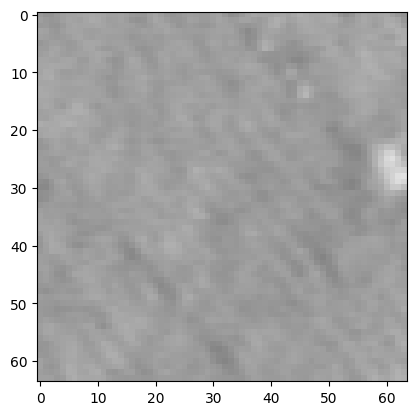

In [15]:
plt.imshow(img)

In [16]:
cv2.imread("/content/training/hole/000_patch1-1.png").shape

(64, 64, 3)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to the range [0, 1]
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,   # Apply zoom transformations
    horizontal_flip=True)  # Flip images horizontally

# Assuming you have five classes (e.g., 'class1', 'class2', ..., 'class5')
train_dataset = train_datagen.flow_from_directory(
    '/content/training',
    target_size=(64, 64),
    batch_size=32,  # Adjust batch size as needed
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=True,
    classes=['good', 'hole', 'objects', 'oil spot', 'thread error'])  # Replace with your class names

validation_dataset = train_datagen.flow_from_directory(
    '/content/validation',
    target_size=(64, 64),
    batch_size=32,  # Adjust batch size as needed
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=True,
    classes=['good', 'hole', 'objects', 'oil spot', 'thread error'])  # Replace with your class names

Found 25600 images belonging to 5 classes.
Found 25600 images belonging to 5 classes.


In [18]:
train_dataset.class_indices

{'good': 0, 'hole': 1, 'objects': 2, 'oil spot': 3, 'thread error': 4}

In [19]:
train_dataset.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [20]:
# Assuming you have a training dataset generator 'train_dataset' and a specified batch size
total_training_samples = len(train_dataset.filenames)  # Total number of training samples
batch_size = 32  # Adjust this to your chosen batch size

steps_per_epoch = total_training_samples // batch_size

In [21]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    # Adjust the output layer for multi-class classification
    tf.keras.layers.Dense(5, activation='softmax')  # Assuming 5 classes
])

In [22]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [23]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = total_training_samples,
                      epochs=5,
                      validation_data=validation_dataset)

Epoch 1/5
  138/25600 [..............................] - ETA: 1:10:58 - loss: 0.5018 - accuracy: 0.9001

KeyboardInterrupt: ignored